
## Classificarea datelor pentru o banca ##


1. Pentru urmatorul model voi folosi setul de date:
https://archive.ics.uci.edu/dataset/222/bank+marketing
Datele despre clienti au fost colectate in urma unor apeluri telefonice organizate de banca , fiind clarificate urmatoarele atribute:
varsta, job, educatie,stare civila,sold anual,daca are deja un imprumut, etc.(total 16 atribute incluzand y - raspunsul)

| #   | Attribute   | Descriere                                         | Tip                                             |
| --- | ----------- | ------------------------------------------------- | ---------------------------------------------- |
| 1   | age         | Vârsta clientului                                | Numeric                                        |
| 2   | job         | Tipul de job                                     | Categorical ("admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") |
| 3   | marital     | Starea civilă                                    | Categorical ("married","divorced","single")       |
| 4   | education   | Nivelul de educație                               | Categorical ("unknown","secondary","primary","tertiary") |
| 5   | default     | Are credit în default?                           | Binary ("yes"/"no")                              |
| 6   | balance     | Sold mediu anual, în euro                         | Numeric                                        |
| 7   | housing     | Are împrumut locativ?                            | Binary ("yes"/"no")                             |
| 8   | loan        | Are împrumut personal?                           | Binary ("yes"/"no")                             |
| 9   | contact     | Tipul de comunicare în contact                   | Categorical ("unknown","telephone","cellular")   |
| 10  | day         | Ziua ultimului contact din lună                 | Numeric                                        |
| 11  | month       | Luna ultimului contact din an                    | Categorical ("jan", "feb", "mar", ..., "nov", "dec") |
| 12  | duration    | Durata ultimului contact, în secunde             | Numeric                                        |
| 13  | campaign    | Numărul de contacte efectuate în această campanie| Numeric                                        |
| 14  | pdays       | Numărul de zile de la ultimul contact dintr-o campanie anterioară| Numeric                       |
| 15  | previous    | Numărul de contacte efectuate înainte de această campanie| Numeric                           |
| 16  | poutcome    | Rezultatul campaniei de marketing anterioare      | Categorical ("unknown","other","failure","success") |
| 17  | y           | Raspunsul clientului despre produs                | Binary ("yes"/"no")                            |


(45211, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
   age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   t

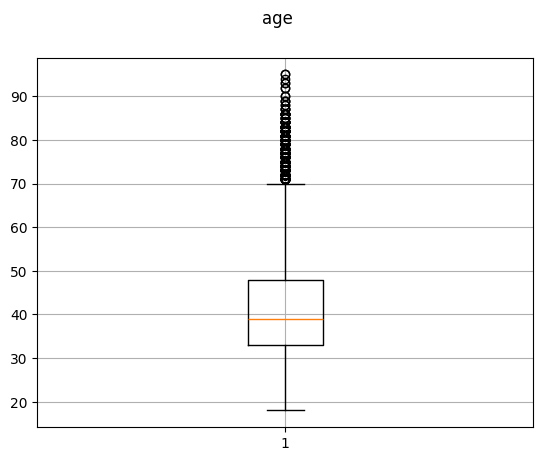

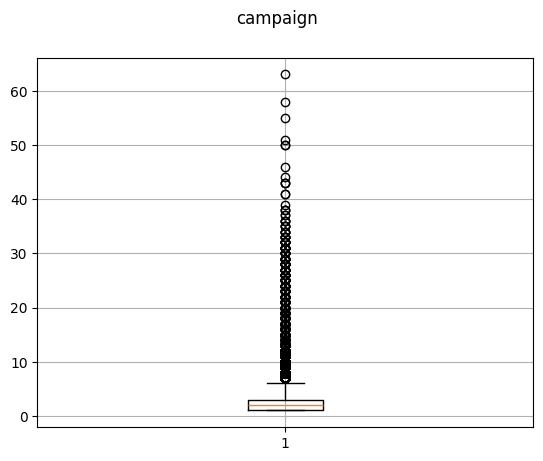

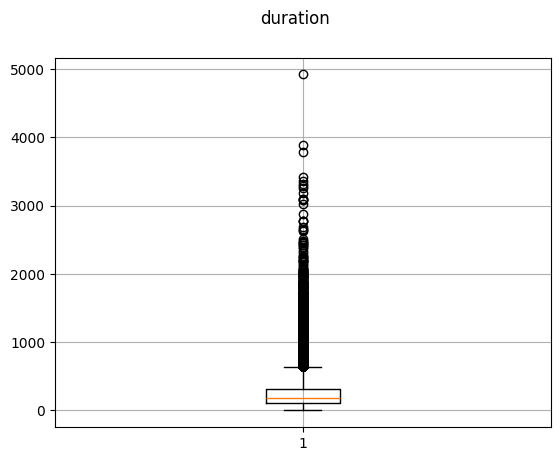

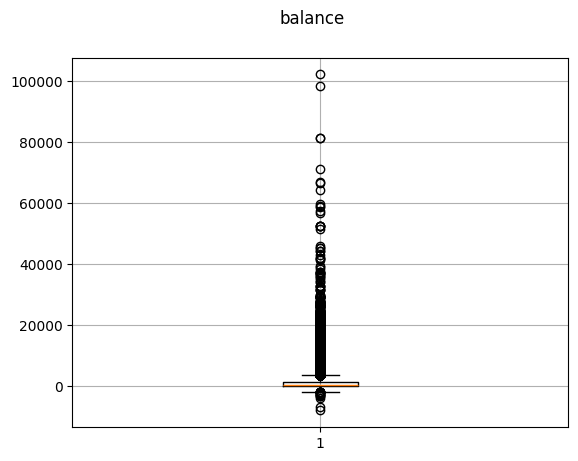

(45197, 16)

In [71]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score, recall_score
import seaborn as sn
from sklearn import metrics

date_banca = pd.read_csv('bank-full-c.csv') #se preiau datele

#Analiza date
#vizualizare tipuri de date
print(date_banca.shape)
print(date_banca.dtypes)
print(date_banca.head(10))
print(date_banca.tail(10))

#Curatarea datelor

#verificare lipsa date
print(date_banca.isnull().sum()) #verificare valori lipsa( 0 - nu sunt valori nule)

#verificare date duplicate
print(date_banca.duplicated().any()) #False semnifica ca nu avem duplicate

#verificare date necoerente
coloane = ['age', 'campaign', 'duration','balance' ]

for c in coloane: 
    plt.suptitle(c)
    plt.boxplot(date_banca[c])
    plt.grid()
    plt.show()

  #dupa obsservarea  graficelor  eliminam datele cu valori nepotrivite
#pentru varsta nu vom elimina  date deoarece au relevanta in acest context 
date_banca= date_banca[(date_banca['campaign']<50)]
date_banca= date_banca[(date_banca['duration']<3500)]
date_banca= date_banca[(date_banca['balance']<70000)]

#resetarea indicilor dupa stergerea datelor nepotrivite
date_banca=date_banca.reset_index(drop=True)

#luam in considerare toate datele colectate pentru fiecare client
X = date_banca.drop(columns=['y'], axis=1)
y = date_banca['y']

X.shape

In [72]:
#convertim date de tip 'categorical' in variabile de tip one-hot encoding
# (in date numerice)
X = pd.get_dummies(X,dtype='int')
y = pd.get_dummies(y,dtype='int')
y = y.drop(['no'], axis=1)

print(X.head(10))
print(y.head(10))

print(X.shape)


   age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   58     2143    5       261         1     -1         0           0   
1   44       29    5       151         1     -1         0           0   
2   33        2    5        76         1     -1         0           0   
3   47     1506    5        92         1     -1         0           0   
4   33        1    5       198         1     -1         0           0   
5   35      231    5       139         1     -1         0           0   
6   28      447    5       217         1     -1         0           0   
7   42        2    5       380         1     -1         0           0   
8   58      121    5        50         1     -1         0           0   
9   43      593    5        55         1     -1         0           0   

   job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month_may  \
0                0                 0  ...          0          0          1   
1                0                 0  ..

In [40]:
#Verificam ce numar de componente pastreaza cantitatea de date satisfacatoare
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_[:45].sum())

0.9999999999999999


### 1.1. Reducerea datelor folosind PCA ###
Principal Component Analysis (PCA) este o tehnică de reducere a dimensionalității care se bazează pe identificarea și reprezentarea componentelor principale ale unui set de date. Scopul principal al PCA este să reducă numărul de caracteristici (dimensiuni) ale setului de date, menținând totuși cât mai multă informație posibilă.


Se calculeaza matricea de covarianță a datelor standardizate. Matricea de covarianță este o măsură a relațiilor dintre diferitele caracteristici ale setului de date.
Calculul Vectorilor și Valorilor Proprii:

Se calculeaza vectorii proprii (PCA) și valorile proprii ale matricei de covarianță. Vectorii proprii reprezintă direcțiile de variație maximă în setul de date, iar valorile proprii reprezintă magnitudinea acestei variații în acele direcții.
Sortarea și Alegerea Componentelor Principale:

Sortează vectorii proprii în ordinea descrescătoare a valorilor proprii și se aleg primele 

k componente principale care se doresc a fi pastrate. 

Matricea de Proiecție:

Se folosesc vectorii proprii selectați pentru a forma matricea de proiecție (

W). Această matrice transformă datele inițiale în noul spațiu de caracteristici format de componentele principale.
Proiecția Datelor:

Se proiecteaza datele inițiale în subspațiul PCA utilizând matricea de proiecție (

W). Rezultatul este un set de date redus la numărul dorit de componente principale.

In [47]:
from sklearn.decomposition import PCA

#reducerea datelor
pca = PCA(n_components = 45)
pca.fit(X)
XP = pca.transform(X)

#impartirea datelor
#Cu PCA
X_train, X_test, y_train, y_test = train_test_split(XP, y, random_state= 50)

#Fara PCA
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 50)

#scalarea datelor
scalare = StandardScaler()
X_train2 = scalare.fit_transform(X_train)
X_test2 = scalare.transform(X_test)
X_train = X_train2
X_test = X_test2



### 1.2Reducere datelor folosind SVD ###
Singular Value Decomposition (SVD) este o tehnică matematică utilizată pentru factorizarea unei matrice într-un produs de matrice, ceea ce poate fi folosit pentru a reduce dimensionalitatea datelor. În contextul clasificării, SVD poate fi aplicată pentru a reduce dimensiunile setului de date, permițând astfel o mai ușoară gestionare a datelor și, în același timp, păstrând o cantitate semnificativă a informației originale.

Se procedeaza astfel:

Matricea de Date:
Avem o matrice X de dimensiuni m×n, unde m este numărul de exemple de antrenare, iar n este numărul de caracteristici.

Descompune matricea 

X în trei matrici: U, S și Vt 
 , unde U și V sunt matrici ortogonale, iar S este o matrice diagonală cu valorile singulare.

X=U⋅S⋅Vt 

Aici, coloanele lui U și V reprezintă vectorii singulare stâng și, respectiv, drept, iar diagonala lui S conține valorile singulare.
Reducerea Dimensionalității:
Alege primele k coloane din matricele U, S, și Vt
  pentru a forma matrici reduse: Uk , Sk, și Vkt, unde k este numărul de componente principale dorite.
Xk=Uk⋅Sk⋅Vkt

Proiecția Datelor:

Proiectează datele inițiale în noul spațiu de dimensiune redusă folosind matricele reduse.
redus
Xredus = Uk*Sk
După acești pași, Xredus conține datele reduse la k componente principale. 

In [67]:
from sklearn.decomposition import TruncatedSVD

#reducerea datelor
svd = TruncatedSVD(n_components=45)
svd.fit(X)
XV = svd.transform(X)

#impartirea datelor
#Cu SVD
X_train, X_test, y_train, y_test = train_test_split(XV, y, random_state= 50)

#Fara SVD
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 50)

#scalarea datelor
scalare = StandardScaler()
X_train2 = scalare.fit_transform(X_train)
X_test2 = scalare.transform(X_test)
X_train = X_train2
X_test = X_test2

2. Problema consta in prezicerea raspunsurilor clientilor in functie de datele colectate, mai exact , daca un client va raspunde cu "da" sau "nu" la achizitionarea produsului propus de banca (aprobarea unui depozit la termen).
Pentru solutie vom utiliza algoritmul SVM(Support Vector Machine) .
SVM este un algoritm de invatare supervizat utilizat pentru clasificare (dar si regresie).Este o tehnică de clasificare binară care utilizează setul de date de antrenament pentru a prezice un hiperplan optim într-un spațiu n-dimensional. Acest hiperplan este utilizat pentru a clasifica noi seturi de date.Astfel avem:

 2.1. Date de Intrare:
   -  ($x_1$, $y_1$), ($x_2$, $y_2$), ..., ($x_n$, $y_n$) , unde  $x_i$ 
   sunt vectorii de caracteristici, iar  $y_i$  sunt etichetele de clasă (1 sau -1).
   

 2.2. Model SVM:
   - Un model SVM încearcă să găsească un hiperplan $$ w \cdot x + b = 0 $$ care să separe cât mai bine exemplele pozitive de cele negative în spațiul caracteristicilor.

 2.3. Funcția Obiectiv:
   - Minimizarea normei vectorului ponderilor $$ ||w|| $$ pentru a maximiza marginea (distanța) dintre hiperplan și punctele cele mai apropiate de el (vectorii suport).

 2.4. Problema de Optimizare:
   - Se rezolvă problema de optimizare:
     $$ \min_{w, b} \frac{1}{2} ||w||^2 $$
     sub condițiile:
     $$ y_i(w \cdot x_i + b) \geq 1 \quad \text{pentru toate } i = 1, 2, ..., n $$

   - Această condiție impune ca toate punctele să fie plasate corect în raport cu hiperplanul, cu o margine de cel puțin 1. Punctele care satisfac această condiție sunt denumite "vectori suport".

   - Pentru SVM, se caută hiperplanul care maximizează marginea și, implicit, minimizează $$ ||w|| $$.

 2.5. Procesul de Decizie:
   - După găsirea $ w $ și $ b $, clasa pentru un nou punct $ x_{\text{test}} $ este determinată prin evaluarea expresiei $$ w \cdot x_{\text{test}} + b $$. Dacă rezultatul este pozitiv, punctul este clasificat în clasa 1; dacă este negativ, este clasificat în clasa -1.







2.6.Antrenarea modelului si evaluarea

In [61]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score, precision_score

MDL = SVC().fit(X_train, y_train)

y_pred = MDL.predict(X_test)

#Acuratete
acSVM = accuracy_score(y_test, y_pred)

print("Date de performanta pentru SVM")
print("Acuratețe:",acSVM)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Date de performanta pentru SVM
Acuratețe: 0.9004424778761062


<Figure size 800x800 with 0 Axes>

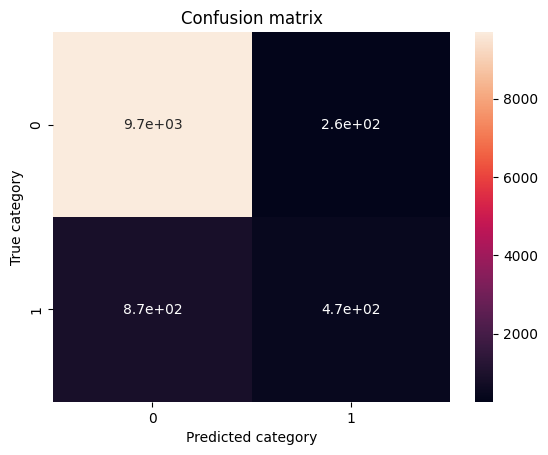

In [62]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,8))
fig, ax = plt.subplots(1)
ax = sn.heatmap(cm, ax=ax, annot=True) #normalize='all'
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()

3.Logistic Regression
Regresia logistică este o tehnică de regresie utilizată în problemele de clasificare. Ea estimează probabilitatea că o instanță de date aparține unei anumite clase. Deși denumită "regresie", este de fapt utilizată pentru clasificare binară sau multi-clasă.

Iată cum funcționează logistic regression:

3.1. **Funcția Logistică (Sigmoid):**
   - Regresia logistică folosește o funcție logistică (sau sigmoid) pentru a transforma rezultatul sumei ponderate a intrărilor într-o valoare între 0 și 1. Funcția sigmoid este definită astfel:

     \[ \sigma(z) = \frac{1}{1 + e^{-z}} \]

     Aici, \( z \) este suma ponderată a intrărilor.

3.2. **Modelul Logistic:**
   - Modelul logistic pentru o singură instanță este dat de:

     \[ p(y=1 | x) = \sigma(\theta^T \cdot x) \]

     Aici, \( p(y=1 | x) \) reprezintă probabilitatea că instanța \( x \) aparține clasei 1, \( \theta \) sunt coeficienții modelului, iar \( \cdot \) reprezintă produsul scalar dintre \( \theta \) și \( x \).

3.3. **Funcția de Cost (Log Loss):**
   - Pentru a antrena modelul, avem nevoie de o funcție de cost. Pentru regresia logistică, se utilizează adesea log loss (entropia încrucișată). Pentru o singură instanță, log loss este dat de:

     \[ J(\theta) = -[y \cdot \log(p) + (1 - y) \cdot \log(1 - p)] \]

     Aici, \( y \) este eticheta actuală (0 sau 1), iar \( p \) este probabilitatea prezisă de model.

3.4. **Antrenarea Modelului:**
   - Antrenarea constă în minimizarea funcției de cost. Acest lucru se face adesea prin gradient descent sau algoritmi mai avansați de optimizare. Scopul este să găsești valorile pentru \( \theta \) care minimizează funcția de cost.

3.5. **Decizie de Clasificare:**
   - Pentru a clasifica o nouă instanță, se calculează probabilitatea folosind funcția sigmoid. Dacă probabilitatea este mai mare de 0.5, instanța este clasificată ca aparținând clasei 1; altfel, este clasificată ca aparținând clasei 0.

Regresia logistică este inițial concepută pentru clasificare binară.

3.6.Antrenarea modelului si evaluarea

In [68]:
#LogisticRegression 
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(random_state=0)
modelLR.fit(X_train, y_train)

y_pred = modelLR.predict(X_test)

acLR = accuracy_score(y_test, y_pred)

print("Date de performanta pentru Logistic Regression")
print("Acuratețe:",acLR)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Date de performanta pentru Logistic Regression
Acuratețe: 0.9011504424778761


<Figure size 800x800 with 0 Axes>

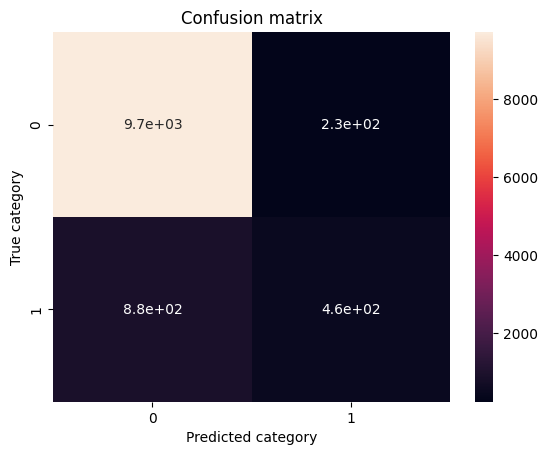

In [69]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,8))
fig, ax = plt.subplots(1)
ax = sn.heatmap(cm, ax=ax, annot=True) 
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()